# Lesson: Let's preprocess the data!

## File I/O and exploring the data

In [1]:
import pandas as pd

f = '../data/census_data.csv'

# read in the file
census = pd.read_csv(f)

# look at the first 5 lines
census.head()

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,fifty_k
0,47,Private,10th,6,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,45,United-States,<=50K
1,40,Private,10th,6,Divorced,Craft-repair,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States,<=50K
2,30,Private,10th,6,Divorced,Other-service,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States,<=50K
3,27,Private,10th,6,Divorced,Transport-moving,Not-in-family,Amer-Indian-Eskimo,Male,75,United-States,<=50K
4,38,Private,10th,6,Divorced,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Female,40,Portugal,<=50K


In [2]:
# What are the column names?
census.columns

Index([u'age', u'work_class', u'education', u'education_num', u'marital_status', u'occupation', u'relationship', u'race', u'sex', u'hours_per_week', u'native_country', u'fifty_k'], dtype='object')

In [3]:
# Sort the DataFrame by age and print out the last 5 lines
census.sort('age').tail()

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,fifty_k
27276,90,Private,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
1725,90,Private,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,<=50K
3524,90,Private,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,<=50K
21269,90,Private,HS-grad,9,Widowed,Transport-moving,Unmarried,White,Male,99,United-States,<=50K
2940,90,Local-gov,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,<=50K


## Selecting columns and rows

In [4]:
# create a subset of the data with the columns education, occupation, hours_per_week. Look at the first 5 rows.
census[['education', 'occupation', 'hours_per_week']].head()

,education,occupation,hours_per_week
0,10th,Exec-managerial,45
1,10th,Craft-repair,40
2,10th,Other-service,40
3,10th,Transport-moving,75
4,10th,Machine-op-inspct,40


In [5]:
# create a subset of the data with rows 50-100 and the columns work_class and race. Look at the first 5 rows.
census.loc[50:100, ['work_class', 'race']].head()

,work_class,race
50,Private,White
51,Private,White
52,Self-emp-not-inc,White
53,Private,White
54,Private,White


In [6]:
# create a subset of the data where education_num is greater than 8 and where sex is equal to Female. Look at the first 5 rows
census[(census['education_num'] > 8) & (census['sex'] == 'Female')].head()

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,fifty_k
3697,46,Private,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,Black,Female,36,United-States,<=50K
3698,41,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,Black,Female,40,Jamaica,<=50K
3699,44,Federal-gov,Assoc-acdm,12,Divorced,Adm-clerical,Not-in-family,Black,Female,40,United-States,<=50K
3700,57,Private,Assoc-acdm,12,Divorced,Adm-clerical,Not-in-family,Black,Female,40,United-States,<=50K
3701,32,Local-gov,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,Black,Female,40,United-States,<=50K


## groupby

In [9]:
# Group by work_class and output the group names (hint: add .keys() to the end of your line of code).
census.groupby('work_class').groups.keys()

['Self-emp-inc',
 'State-gov',
 'Without-pay',
 'Private',
 'Local-gov',
 'Self-emp-not-inc',
 'Federal-gov']

In [10]:
# Let's group by work_class and use the mean as the aggregate function
census.groupby('work_class').agg('mean')

,age,education_num,hours_per_week
work_class,,,
Federal-gov,42.577943,10.948038,41.279958
Local-gov,41.743106,11.036768,41.002419
Private,36.794355,9.871085,40.250875
Self-emp-inc,46.027933,11.167598,48.802607
Self-emp-not-inc,45.011605,10.211285,44.432173
State-gov,39.362002,11.349492,39.053948
Without-pay,47.785714,9.071429,32.714286


## Pivoting

In [12]:
# Let's pivot on education_num and sex, with hours_per_week as the values and mean as the aggfunc
pd.pivot_table(census, index='education_num', columns='sex', values='hours_per_week', aggfunc='mean')

sex,Female,Male
education_num,,
1,32.142857,39.000000
2,31.883721,40.962963
3,34.942029,40.013699
4,36.901515,41.134118
5,34.739496,40.193452
6,32.548000,39.621053
7,29.528302,36.750369
8,31.524590,37.694118
9,37.128783,42.847045


In [ ]:
# Create a pivot table of your choosing, with any columns for rows and cols and a numerical columns for values.



## Let's do the following:

For the machine learning section, can you extract a subset of the data where:

- `native_country` equals `United-States`
- `hours_per_week` is greater than 10
- `age` is greater than 20 and less than 50
- `education` is `Masters`

It's going to be a bunch of boolean indexing!

In [20]:
# Store that new dataframe in new_df and print out the first five rows.
new_df = census[(census['native_country'] == 'United-States') & (census['hours_per_week'] > 10) & (census['age'] < 50) \
                & (census['age'] > 20) & (census['education'] == 'Masters')]
new_df.head()

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,fifty_k
21271,46,Local-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States,<=50K
21279,45,Local-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,Black,Male,40,United-States,<=50K
21280,47,Local-gov,Masters,14,Divorced,Protective-serv,Not-in-family,Black,Male,50,United-States,>50K
21281,31,Private,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
21285,45,Self-emp-not-inc,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,15,United-States,<=50K


In [26]:
# Split the DataFrame so that all of the columns except the last one are in new_df_data, and the last one is in new_df_labels.

new_df_data = census.iloc[:, 0:11]
new_df_labels = census.loc[:, 'fifty_k']

# For those using IPython Notebook/Wakari/NBViewer: Go to the [scikit_learn](scikit_learn.ipynb) notebook!

(For those using code files, please go to scikit_learn_materials.py!)

###End of Pandas section.

# Lesson: let's classify our data!

## Final preprocessing touches

Scikit-learn estimators take in continuous data only, which means that we'll have to transform our categorical data into something the scikit-learn estimators can handle. This is actually much easier than it sounds! We're going to convert our dataframe into a dictionary, and then encode the data in that dictionary into arrays of 1s and 0s.

Let's first transform the `DataFrame` into a dictionary. We first have to transpose our `DataFrame`, so there is one row per nested dictionary. Finally, we'll put each item into a list, because scikit-learn's `DictVectorizer` object takes a list of dictionaries to encode. We also only need the values from our list of dictionaries.

In [27]:
new_df_transpose = new_df_data.transpose()

data_into_dict = new_df_transpose.to_dict()
census_data = [v for k, v in data_into_dict.iteritems()]

Now, let's encode those features and instances.

In [28]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
transformed_data = dv.fit_transform(census_data).toarray()
transformed_data

array([[ 47.,   1.,   0., ...,   0.,   0.,   0.],
       [ 40.,   1.,   0., ...,   0.,   0.,   0.],
       [ 30.,   1.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 74.,   0.,   0., ...,   0.,   0.,   0.],
       [ 50.,   0.,   0., ...,   0.,   0.,   0.],
       [ 48.,   0.,   0., ...,   0.,   0.,   0.]])

Now that we've done that, let's encode the labels.

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transformed_labels = le.fit_transform(new_df_labels)
transformed_labels

array([0, 0, 0, ..., 0, 0, 1])

Now that we've done that, can you separate the `transformed_data` and `transformed_labels` into training and test sets?

In [36]:
from sklearn.cross_validation import train_test_split

census_train, census_test, labels_train, labels_test = train_test_split(transformed_data, transformed_labels)

Let's fit and predict all three classifiers to this data.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# fit all
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
gnb = GaussianNB()

knn.fit(census_train, labels_train)
tree.fit(census_train, labels_train)
gnb.fit(census_train, labels_train)

# predict all
knn_pred = knn.predict(census_test)
tree_pred = tree.predict(census_test)
gnb_pred = gnb.predict(census_test)

# Output kNN predictions on first 10 labels
knn_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [38]:
# Output decision tree predictions on first 10 labels
tree_pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [39]:
# Output NB predictions on first 10 labels

gnb_pred[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

Let's cross validate each.

In [40]:
# Run cross-validation on kNN. Set cv=5
from sklearn.cross_validation import cross_val_score
cross_val_score(knn, transformed_data, transformed_labels, cv=5)

array([ 0.78153489,  0.67445715,  0.70561909,  0.84084881,  0.78229149])

In [41]:
# Run cross-validation on tree. Set cv=5
cross_val_score(tree, transformed_data, transformed_labels, cv=5)

array([ 0.74672634,  0.32736615,  0.42947124,  0.75132626,  0.75509866])

In [42]:
# Run cross-validation on NB. Set cv=5
cross_val_score(gnb, transformed_data, transformed_labels, cv=5)

array([ 0.56323554,  0.31791812,  0.39515995,  0.64472812,  0.77814624])

# For those using IPython Notebook/Wakari/NBViewer: Go to the [matplotlib](matplotlib.ipynb) notebook!

(For those using code files, please go to matplotlib_materials.py!)

### End of scikit-learn section.

# Lesson: what can plots tell us about our data and results?

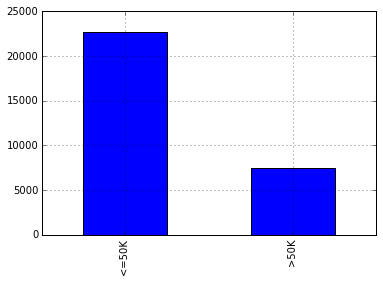

In [54]:
# Let's look at the distribution of classes in our dataset. Can you get the value_counts of new_df_labels 
# and make a bar chart using Pandas?
%matplotlib inline
import matplotlib.pyplot as plt
label_dist = new_df_labels.value_counts()
label_dist.plot(kind='bar')

<Container object of 2 artists>

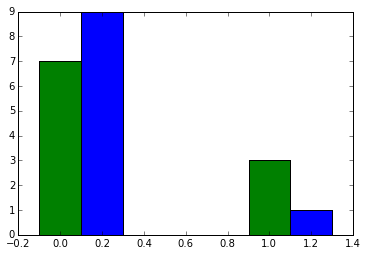

In [60]:
# Now, can you make a bar chart comparing the predicted kNN labels to the actual labels? You can use the first 10 only if you want.

pred = list(knn.predict(census_test))[:10]
x = [0, 1]
x2 = [0.1, 1.1]
y = [pred.count(0), pred.count(1)]
lab_test = list(labels_test)[:10]
y2 = [lab_test.count(0), lab_test.count(1)]

plt.bar(x2, y, width=0.2)
plt.bar(x, y2, width=0.2, color='green', align='center')

In [ ]:
# What other visualizations would be helpful? Can you come up with a few more?

